In [160]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [161]:
# Load dataset
path = r"Datasets\Data_Negara_HELP.csv"
dataset = pd.read_csv(path)

# Melihat 10 data pertama
dataset.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [162]:
# Melihat info dari dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [163]:
# Melihat statistika deskriptif dari dataset
dataset.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Figure size 1000x1000 with 0 Axes>

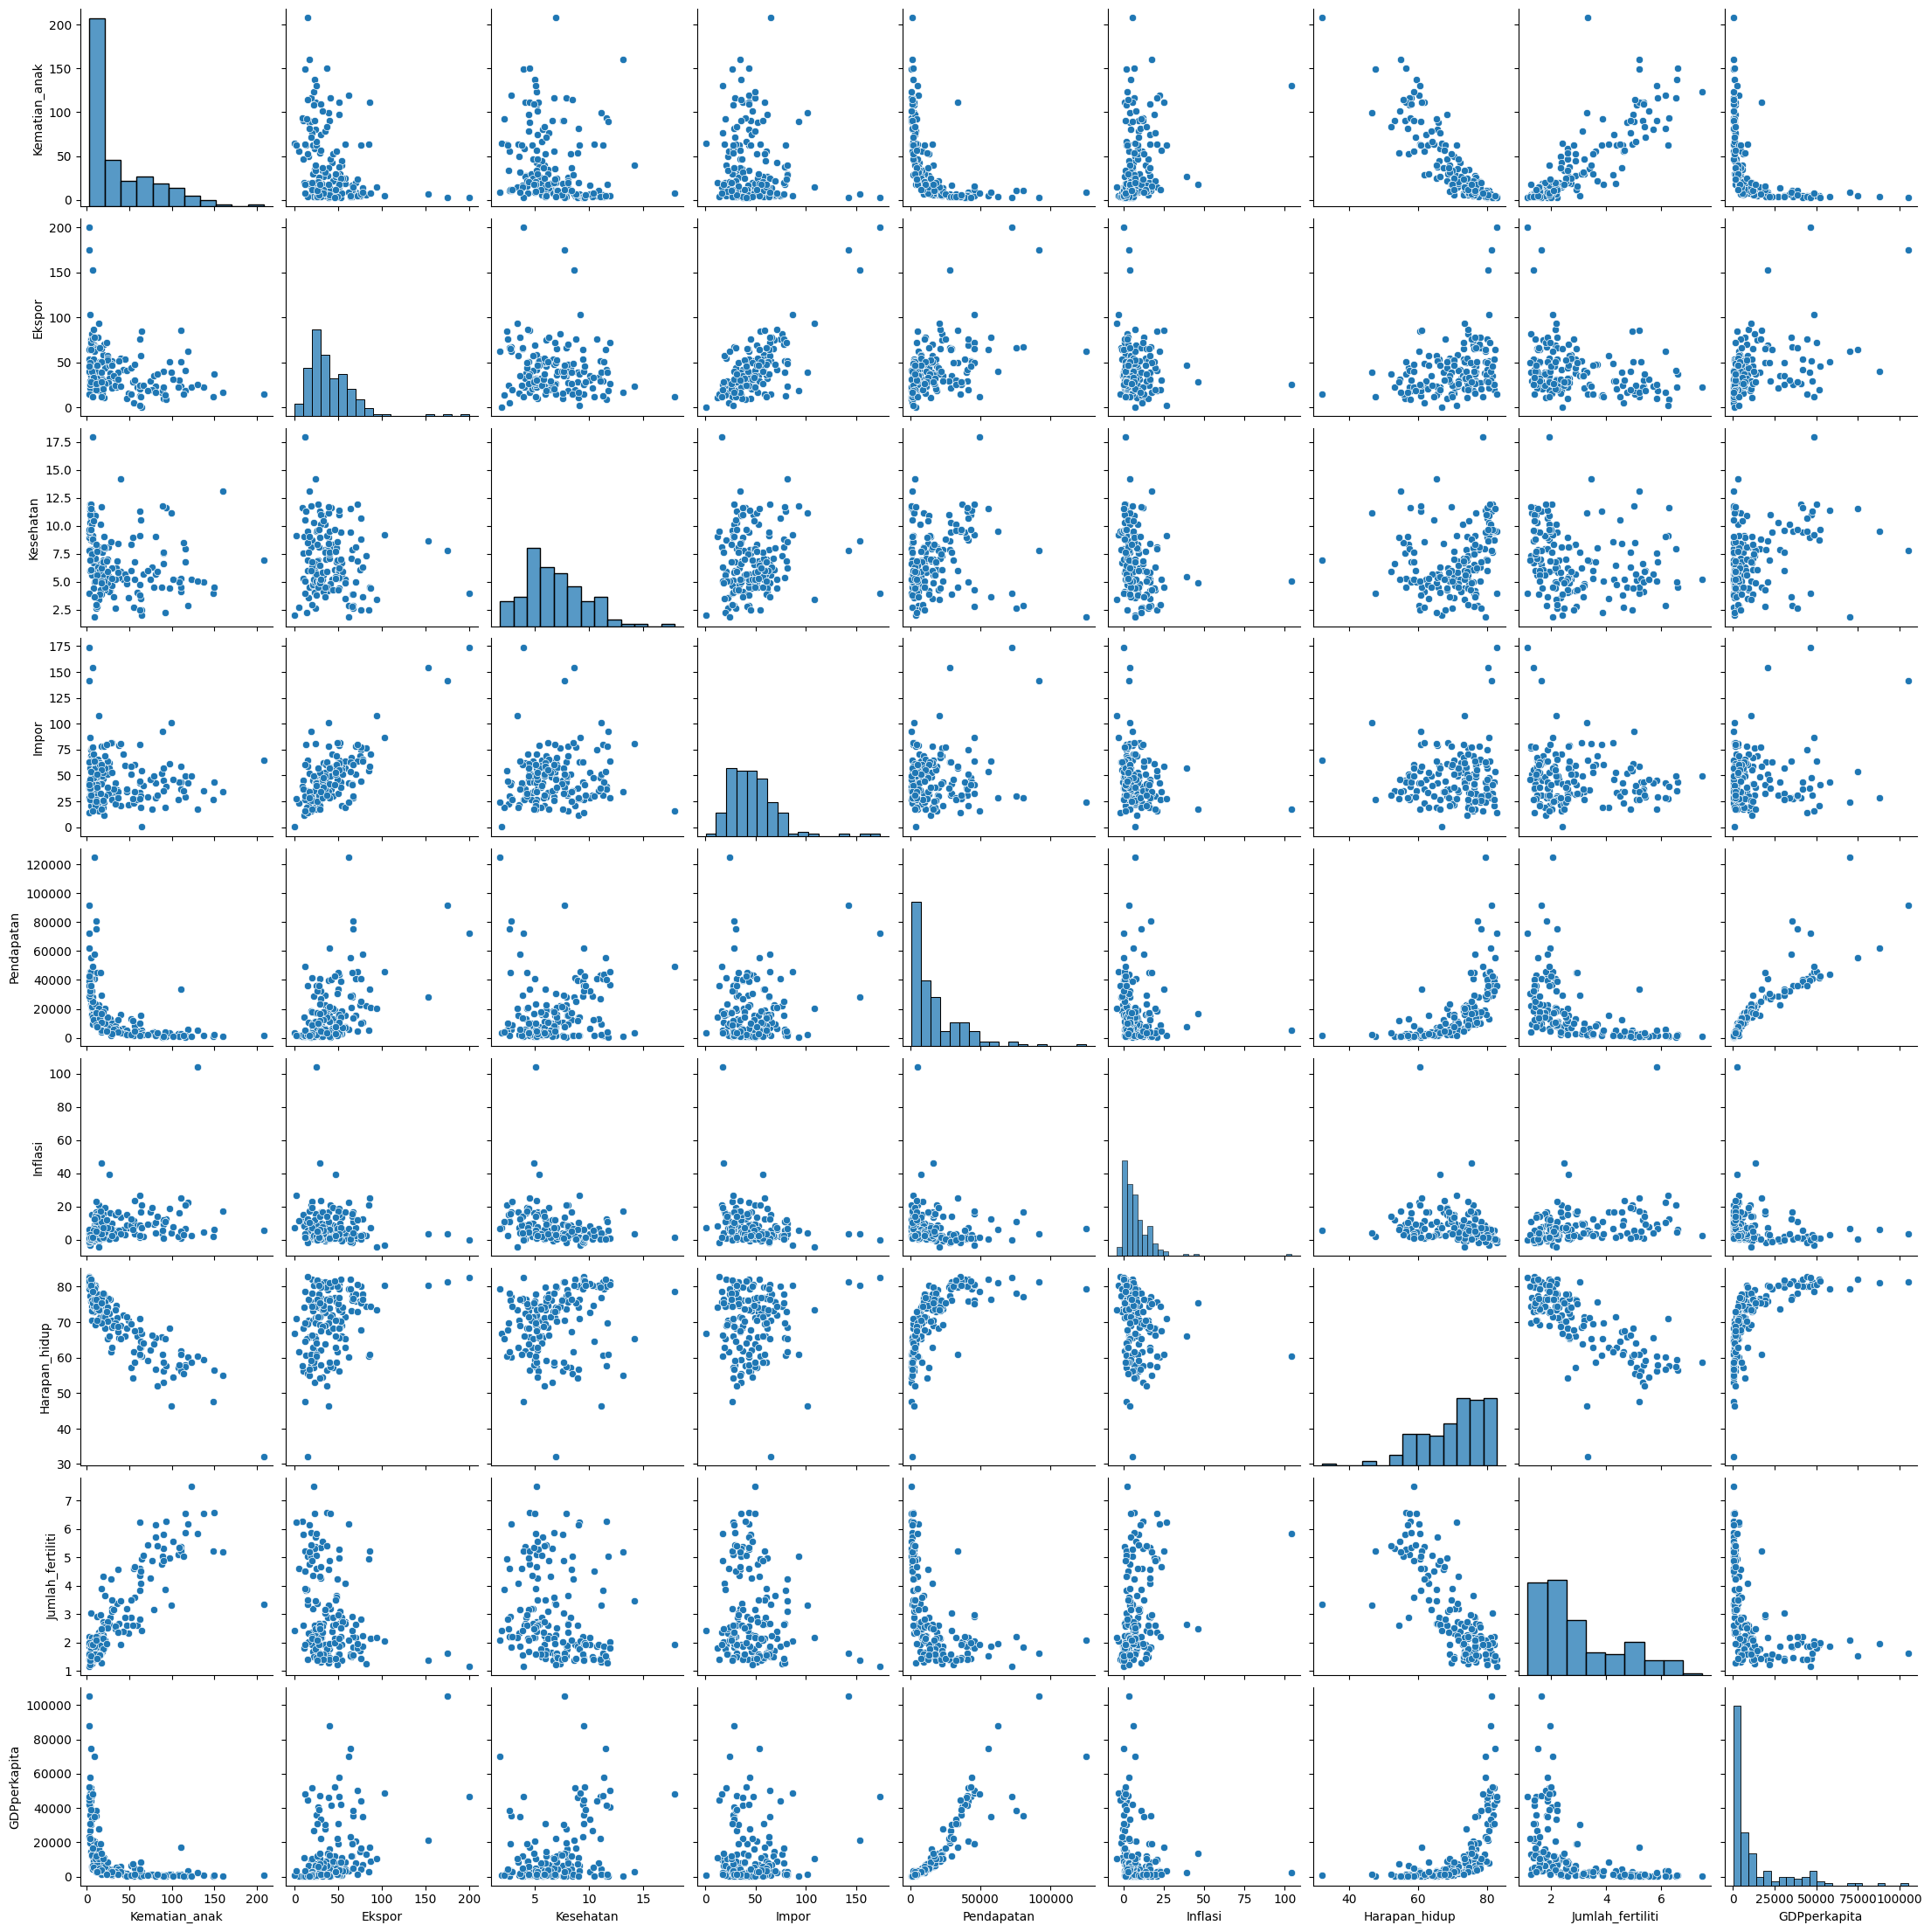

In [164]:
# Melakukan multivariate analysis untuk menemukan korelasi antar-kolom
plt.figure(figsize=(10,10))
sns.pairplot(data=dataset)
plt.show()

In [165]:
# Selanjutnya kita melihat koefisien korelasi antar kolom dengan method corr()

dataset_matrix = dataset.corr(numeric_only=True)

dataset_matrix

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Kematian_anak,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
Ekspor,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
Kesehatan,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
Impor,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
Pendapatan,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
Inflasi,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
Harapan_hidup,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
Jumlah_fertiliti,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
GDPperkapita,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [166]:
# Mem-filter dataset dengan fitur yang akan kita gunakan
df_selected = dataset[['Pendapatan', 'Harapan_hidup']]

df_selected

,Pendapatan,Harapan_hidup
0,1610,56.2
1,9930,76.3
2,12900,76.5
3,5900,60.1
4,19100,76.8
...,...,...
162,2950,63.0
163,16500,75.4
164,4490,73.1
165,4480,67.5


In [167]:
# Kita mengecek apakah ada missing value pada dataset kita
print(df_selected.isnull().sum())

# Kita mengecek apakah tipe data sudah sesuai (bukan berbentuk object)
print("\n")
print(df_selected.info())

Pendapatan       0
Harapan_hidup    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pendapatan     167 non-null    int64  
 1   Harapan_hidup  167 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB
None


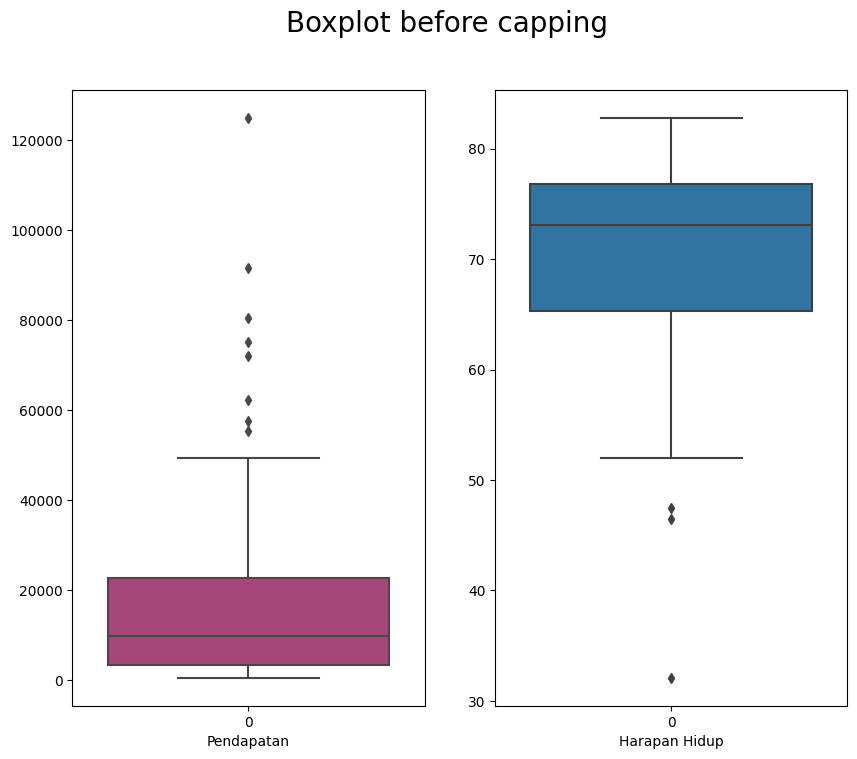

In [168]:
# Kita mengecek apakah ada outlier pada data kita menggunakan visualisasi boxplot dari Seaborn
plt.figure(figsize=(10, 8))
plt.suptitle("Boxplot before capping", fontsize=20)
plt.subplot(1, 2, 1)
sns.boxplot(data=df_selected['Pendapatan'], palette="magma")
plt.xlabel("Pendapatan")
plt.subplot(1, 2, 2)
sns.boxplot(data=df_selected['Harapan_hidup'])
plt.xlabel("Harapan Hidup")
plt.show()

In [169]:
# Seperti yang terlihat pada boxplot diatas, bahwa pada masing-masing kolom masih terdapat outlier.
# Oleh karena itu, kita akan menangani outlier-outlier tersebut 

# Kita mendefinisikan Q1 dan Q3 dari masing-masing kolom
quantile = df_selected.quantile([.25, .75])

Q1_pendapatan, Q3_pendapatan = [x[0] for x in quantile.values]
Q1_harapan, Q3_harapan = [x[1] for x in quantile.values]

# Kita mendefinisikan IQR dari masing-masing kolom
IQR_pendapatan = Q3_pendapatan - Q1_pendapatan
IQR_harapan = Q3_harapan - Q1_harapan

# Kita mendefinisikan min_limit dan max_limit dari masing-masing kolom
min_limit_pendapatan = Q1_pendapatan - (1.5 * IQR_pendapatan)
max_limit_pendapatan = Q3_pendapatan + (1.5 * IQR_pendapatan)
min_limit_harapan = Q1_harapan - (1.5 * IQR_harapan)
max_limit_harapan = Q3_harapan + (1.5 * IQR_harapan)

In [170]:
# Kita mengubah data yang lebih kecil dari min_limit menjadi min_limit 
# Dan mengubah data yang lebih besar dari max_limit menjadi max_limit

df_selected_new = pd.DataFrame({
    "Pendapatan": np.where(
        df_selected['Pendapatan'] < min_limit_pendapatan, min_limit_pendapatan, 
        (np.where(
            df_selected['Pendapatan'] > max_limit_pendapatan, max_limit_pendapatan, df_selected['Pendapatan']
        ))
    ),
    "Harapan_hidup": np.where(
        df_selected['Harapan_hidup'] < min_limit_harapan, min_limit_harapan,
        (np.where(
            df_selected['Harapan_hidup'] > max_limit_harapan, max_limit_harapan, df_selected['Harapan_hidup']
        ))
    )
})

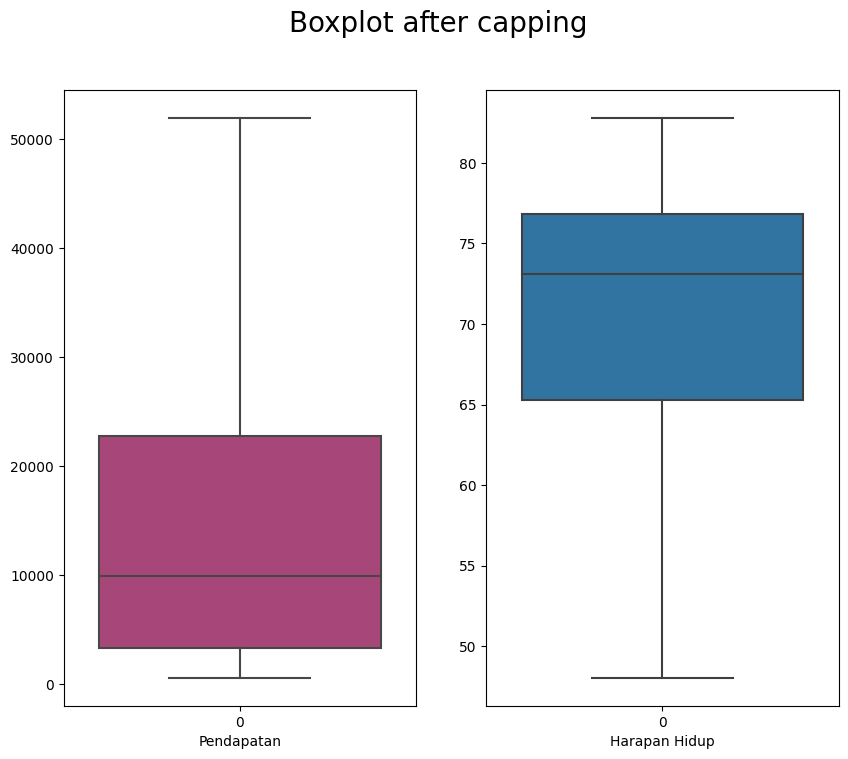

In [171]:
# Mengecek kembali outlier
plt.figure(figsize=(10, 8))
plt.suptitle("Boxplot after capping", fontsize=20)
plt.subplot(1, 2, 1)
sns.boxplot(data=df_selected_new['Pendapatan'], palette="magma")
plt.xlabel("Pendapatan")
plt.subplot(1, 2, 2)
sns.boxplot(data=df_selected_new['Harapan_hidup'])
plt.xlabel("Harapan Hidup")
plt.show()

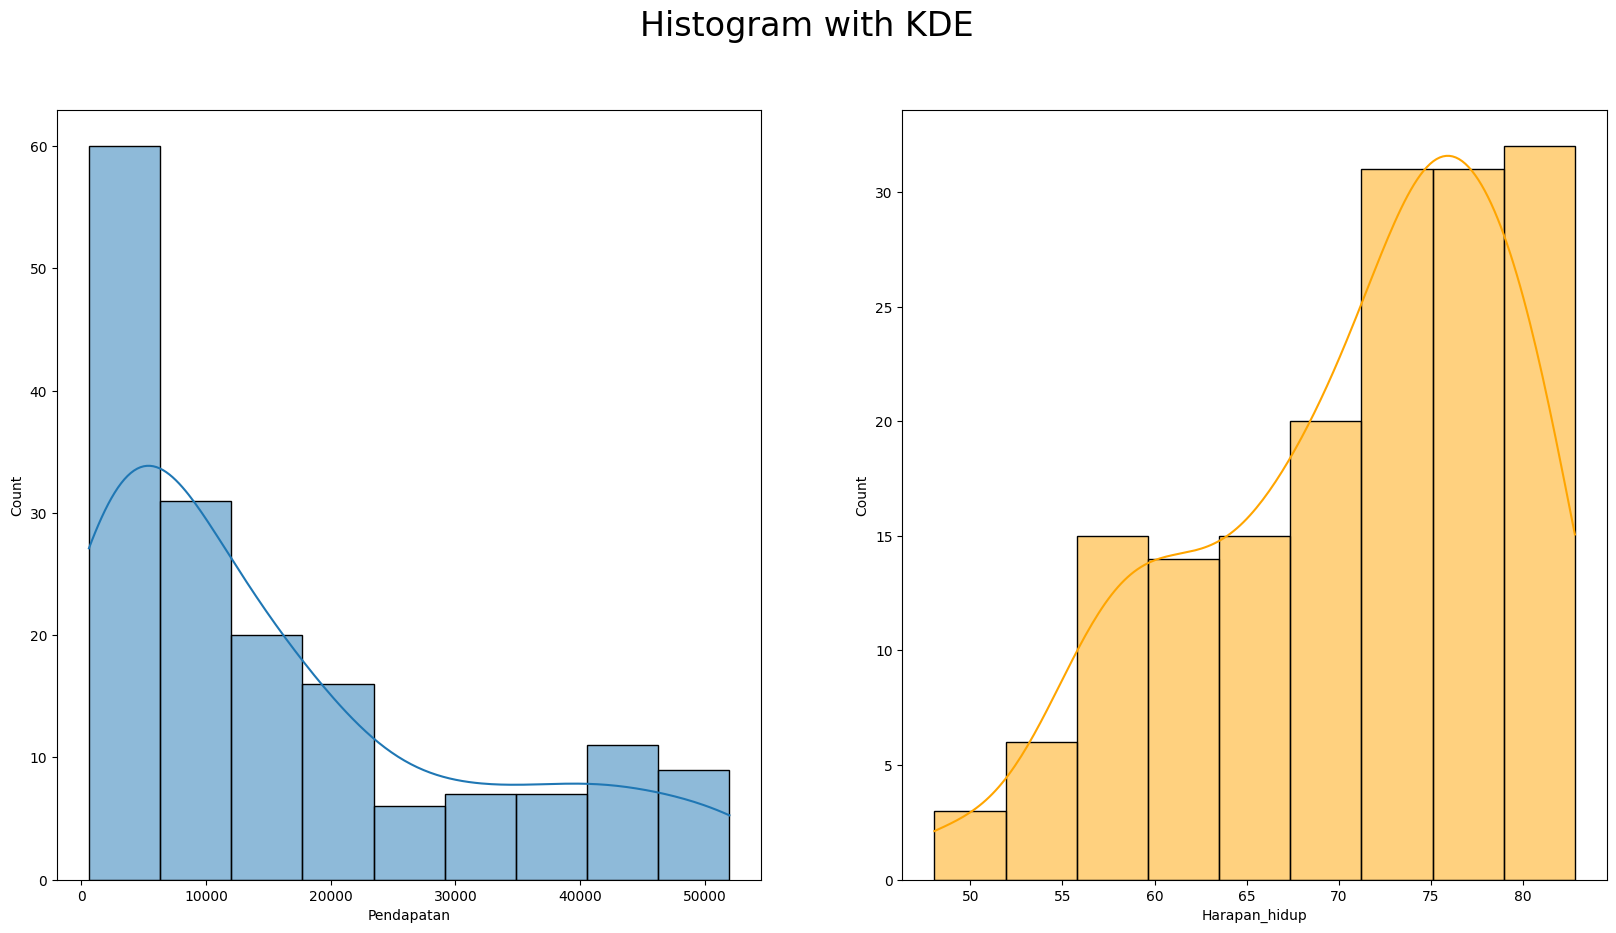

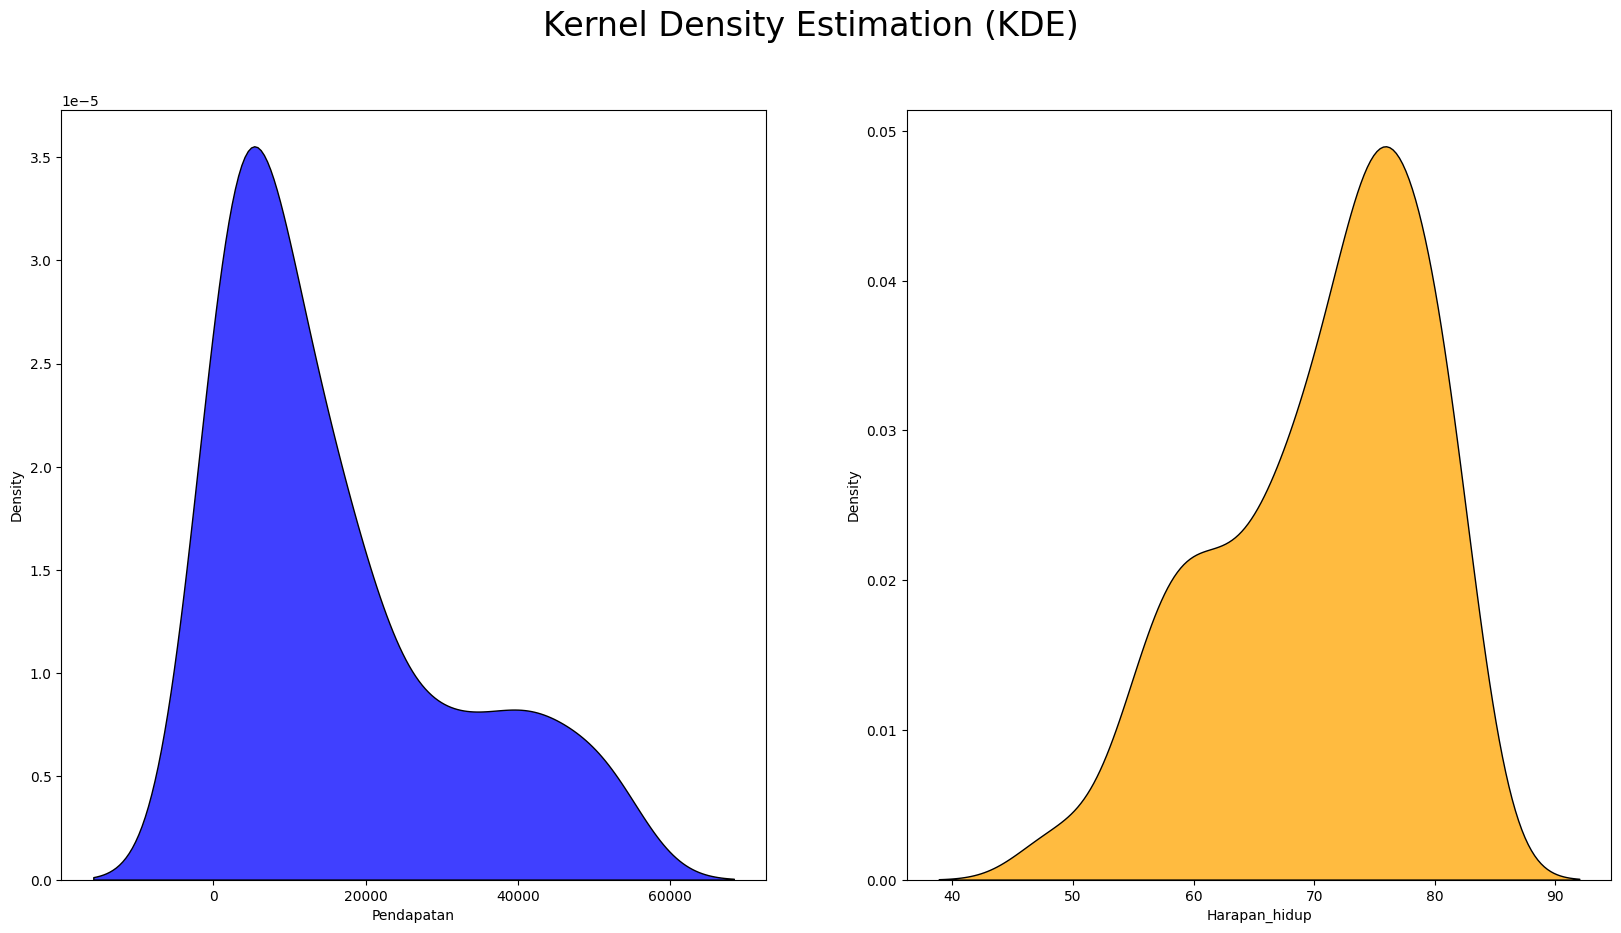

In [172]:
# Univariate Analysis
## Histogram
plt.figure(figsize=(20, 10))
plt.suptitle("Histogram with KDE", fontsize=24)
plt.subplot(1, 2, 1)
sns.histplot(data=df_selected_new, x="Pendapatan", kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data=df_selected_new, x="Harapan_hidup", color="orange", kde=True)
plt.show()

## Kernel Density Estimation (KDE)
plt.figure(figsize=(20, 10))
plt.suptitle("Kernel Density Estimation (KDE)", fontsize=24)
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_selected_new, x="Pendapatan", color="blue", multiple="stack")
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_selected_new, x="Harapan_hidup", color="orange", multiple="stack")
plt.show()

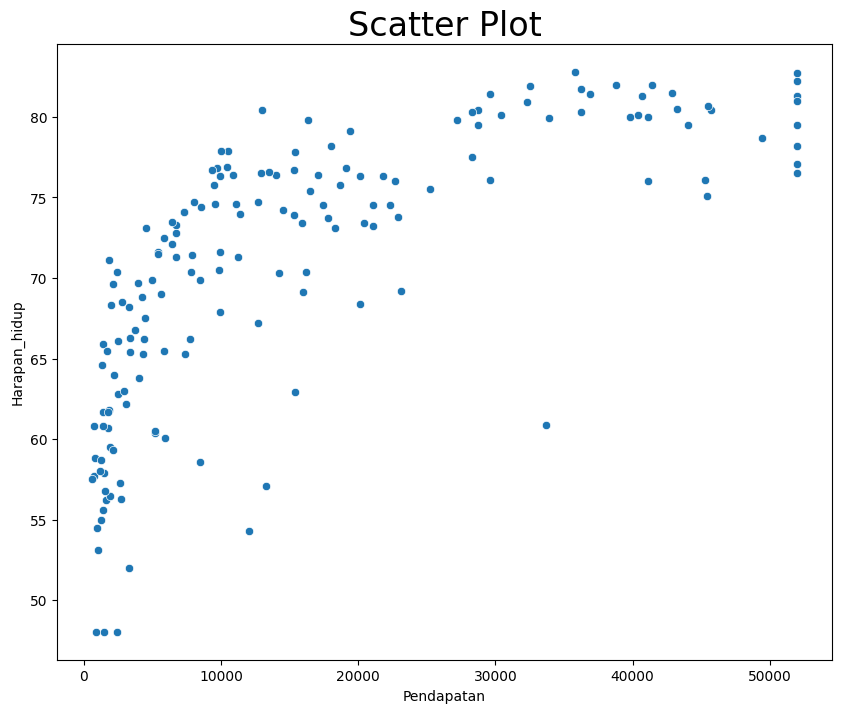

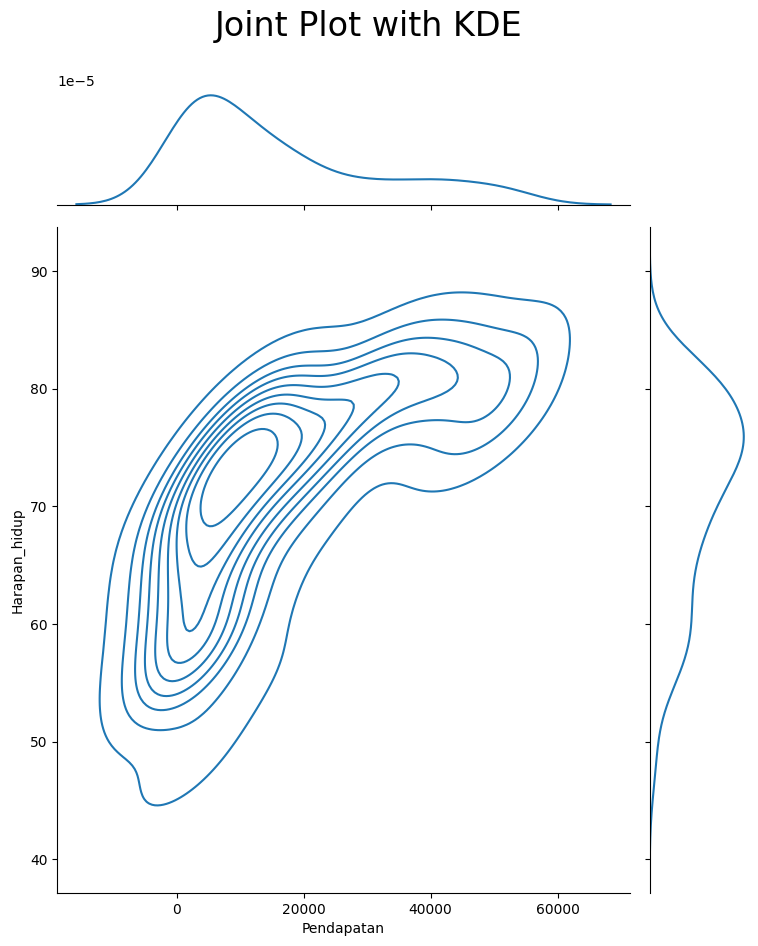

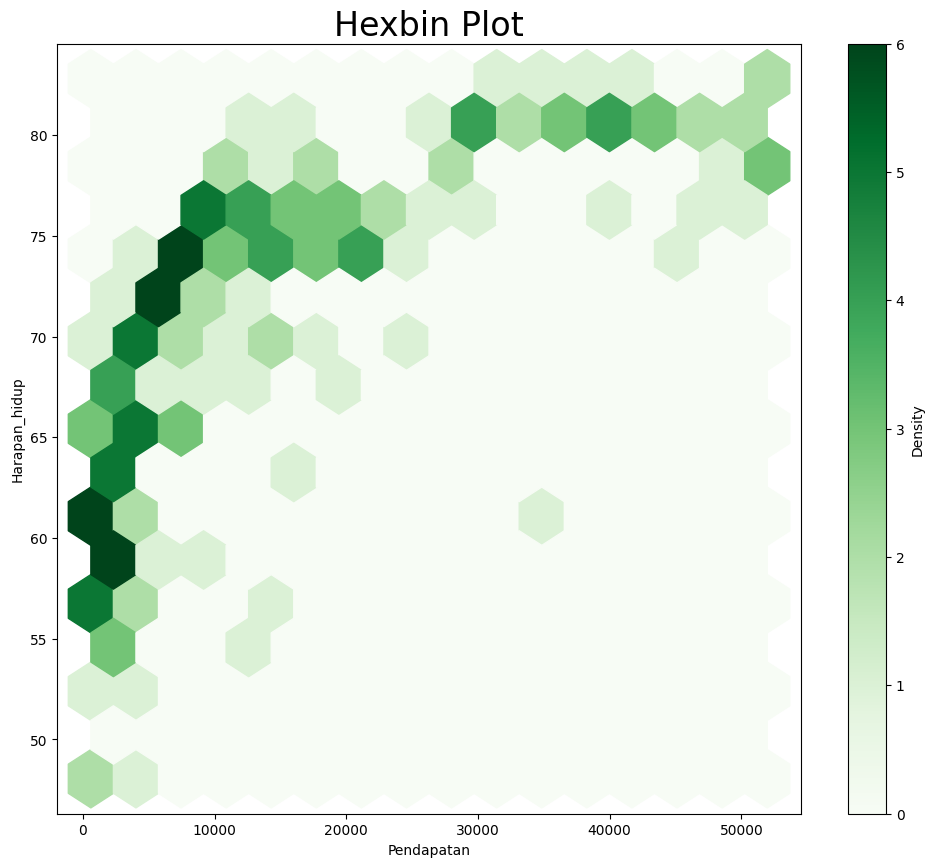

In [173]:
# Bivariate Analysis
## Scatter Plot
plt.figure(figsize=(10, 8))
plt.title("Scatter Plot", fontsize=24)
sns.scatterplot(data=df_selected_new, x="Pendapatan", y="Harapan_hidup")
plt.show()

## Joint Plot
p = sns.jointplot(data=df_selected_new, x="Pendapatan", y="Harapan_hidup", kind="kde")
p.fig.set_figwidth(8)
p.fig.set_figheight(10)
p.fig.suptitle("Joint Plot with KDE", fontsize=24)
p.fig.subplots_adjust(top=.9)

## Hexbin
plt.figure(figsize=(12, 10))
plt.title("Hexbin Plot", fontsize=24)
hb = plt.hexbin(x=df_selected_new['Pendapatan'], y=df_selected_new['Harapan_hidup'], gridsize=15, cmap="Greens")
cb = plt.colorbar(hb)
cb.set_label("Density")
plt.xlabel("Pendapatan")
plt.ylabel("Harapan_hidup")
plt.show()

In [174]:
# Menormalisasi dataset
def min_max_scaler(data):
    min_data = min(data)
    max_data = max(data)
    scaled_data = (data - min_data) / (max_data - min_data)
    return scaled_data

normalize_data = df_selected_new.apply(min_max_scaler)

normalize_data

,Pendapatan,Harapan_hidup
0,0.019490,0.234532
1,0.181489,0.812950
2,0.239318,0.818705
3,0.103021,0.346763
4,0.360038,0.827338
...,...,...
162,0.045582,0.430216
163,0.309413,0.787050
164,0.075567,0.720863
165,0.075372,0.559712


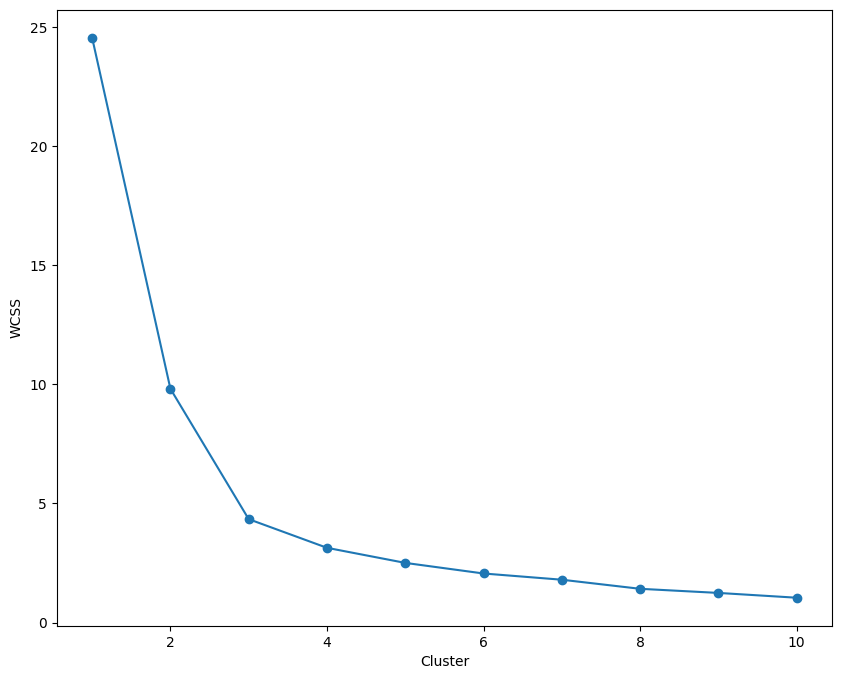

In [175]:
# Mencari jumlah cluster menggunakan Elbow Method
wcss = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=1234, n_init="auto").fit(normalize_data)
    wcss.append(kmeans.inertia_)
    k_list.append(k)

plt.figure(figsize=(10, 8))
plt.plot(k_list, wcss, marker="o", label="Elbow Method")
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.show()


In [179]:
# Kita akan melakukan Clustering menggunakan metode K-Means
# Dengan jumlah cluster yang dibuat adalah 8

kmeans_model = KMeans(n_clusters=8, random_state=1234, n_init="auto")
kmeans_model.fit(normalize_data)

kmeans_labels = kmeans_model.labels_
final_dataset = pd.DataFrame(df_selected_new, columns=["Pendapatan", "Harapan_hidup"])
final_dataset["Cluster"] = kmeans_labels
final_dataset["Negara"] = dataset["Negara"]

# Mengurutkan kolom-kolomnya
final_dataset = final_dataset[['Negara', 'Pendapatan', 'Harapan_hidup', 'Cluster']]

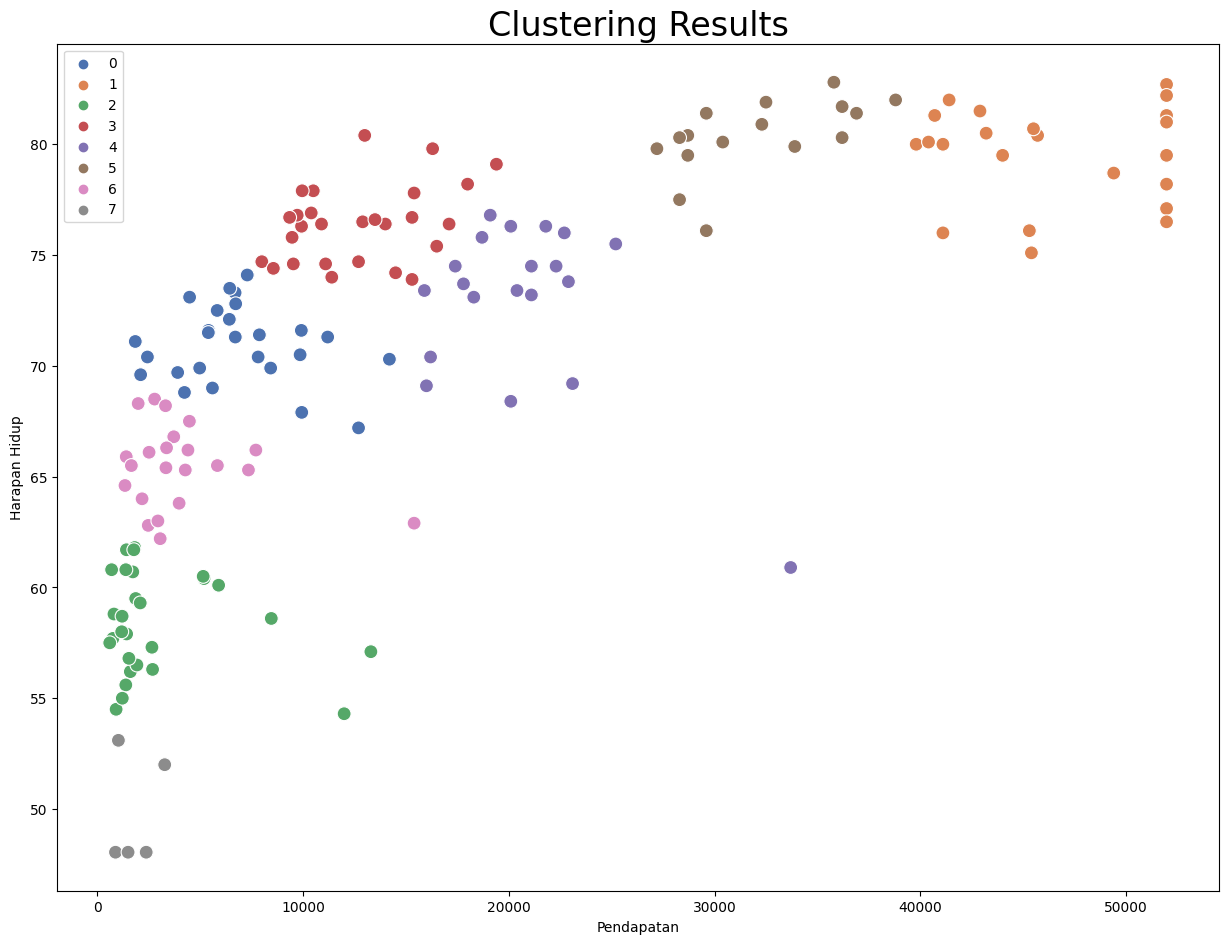

In [182]:
# Membuat grafik Cluster
plt.figure(figsize=(15,11))
sns.scatterplot(data=final_dataset, x="Pendapatan", y="Harapan_hidup", s=100, hue="Cluster", legend="full", palette="deep")
centers = kmeans_model.cluster_centers_
plt.title("Clustering Results", fontsize=24)
plt.legend()
plt.xlabel("Pendapatan")
plt.ylabel("Harapan Hidup")
plt.show()

In [183]:
# Negara dengan cluster nomor 7
final_dataset[final_dataset['Cluster'] == 7]

,Negara,Pendapatan,Harapan_hidup,Cluster
31,Central African Republic,888.0,48.05,7
66,Haiti,1500.0,48.05,7
87,Lesotho,2380.0,48.05,7
94,Malawi,1030.0,53.10,7
166,Zambia,3280.0,52.00,7
